<a href="https://colab.research.google.com/github/anushavk416/zomato-bengaluru-DA/blob/main/assessment_28_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
#importing all libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [150]:
df = pd.read_excel("zomato_rest_data.xlsx")

 ## 1. Data Understanding & Cleaning

 1. Dataset Exploration:
- Display first 5 rows
- Display shape of dataset (rows and columns)
- List column names
- Check data types
- Identify missing values
2. Data Cleaning:

    Perform necessary cleaning steps like,
    - Remove duplicate records
    - Handle missing values appropriately
    - Clean the rating column (remove “NEW”, “-”, etc.)

    Convert:
    - Rating column to numeric
    - Cost column to numeric (remove commas if present)
    - Students must clearly explain all cleaning steps using markdown cells.

In [151]:
# first 5 records:
df.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [69]:
# shape of dataset
df.shape

(51717, 18)

In [109]:
# list of all columns
df.columns

Index(['Unnamed: 0', 'url', 'address', 'name', 'online_order', 'book_table',
       'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked',
       'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [70]:
# data type of each column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [71]:
# gives the number of missing values in each column
df.isnull().sum()

,0
Unnamed: 0,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21


In [110]:
#dropping duplicates
df.shape #(51717, 18)
df.drop_duplicates(inplace = True)
df.shape #(51717, 18) i.e., has no duplicates

(51717, 18)

In [152]:
#removing possible unwanted values
df['dish_liked'] = df['dish_liked'].str.strip()
df['name'] = df['name'].str.strip()
df['listed_in(type)'] = df['listed_in(type)'].str.strip()
df['listed_in(city)'] = df['listed_in(city)'].str.strip()

In [153]:
#dropping unwanted columns
droplist = ['Unnamed: 0', 'address', 'url', 'phone', 'reviews_list', 'location', 'rest_type', 'menu_item']
df = df.drop(droplist, axis=1)

In [154]:
#dealing with rate column
df['rate'] = df['rate'].str.replace('NEW', '-')
df['rate'] = df['rate'].str.strip('/5')
df['rate'] = df['rate'].str.strip()
df['rate'] = df['rate'].str.replace('-', '0')
df['rate'] = df['rate'].astype(float)
df['rate'] = df['rate'].fillna(df['rate'].mean())
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       0.        , 2.9       , 3.48909244, 2.6       , 3.4       ,
       2.        , 2.7       , 4.7       , 2.4       , 2.2       ,
       2.3       , 4.8       , 3.5       , 2.5       , 4.5       ,
       4.9       , 2.1       , 1.8       ])

In [155]:
#renaming columns
newnamedict = {'listed_in(type)': 'rest_type', 'listed_in(city)': 'location', 'approx_cost(for two people)': 'cost for 2'}
df = df.rename(columns=newnamedict)

In [156]:
#handling cost for 2 column
df['cost for 2'] = df['cost for 2'].str.replace(',', '')
df['cost for 2'] = df['cost for 2'].astype(float)
df['cost for 2'] = df['cost for 2'].fillna(df['cost for 2'].mean())
df['cost for 2'] = df['cost for 2'].astype(int)
df['cost for 2'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700,  555,
       1400,  180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000,
       2800, 3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,
         70, 3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000,
       3700, 1650, 2700, 4500,  140])

In [157]:
# handling name column
df['name'] = df['name'].str.capitalize()
df['name']

,name
0,Jalsa
1,Spice elephant
2,San churro cafe
3,Addhuri udupi bhojana
4,Grand village
...,...
51712,Best brews - four points by sheraton bengaluru...
51713,Vinod bar and restaurant
51714,Plunge - sheraton grand bengaluru whitefield h...
51715,Chime - sheraton grand bengaluru whitefield ho...


In [158]:
#handling book_table column
# can convert book_Table into int (yes/no into 1/0)
mappingdict = {'Yes': '1', 'No': '0'}
df['book_table'] = df['book_table'].map(mappingdict)
df['book_table'] = df['book_table'].astype(int)
df['book_table'].unique()

In [ ]:
#handling online_order column
# can convert book_Table into int (yes/no into 1/0)
df['online_order'] = df['online_order'].map(mappingdict)
df['online_order'] = df['online_order'].astype(int)
df['online_order'].unique()

In [160]:
#handling dish_liked
len(df['dish_liked'].unique()) #5272, i.e., there are some repeated values. hence nulls can be filled with mode.
df['dish_liked'].mode()
df['dish_liked'] = df['dish_liked'].fillna(df['dish_liked'].mode()[0])
df['dish_liked'].isnull().sum()

np.int64(0)

In [161]:
#handling cuisines
len(df['cuisines'].unique()) #2724, i.e., there are some repeated values. hence nulls can be filled with mode.
df['cuisines'].mode()
df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode()[0])
df['cuisines'].isnull().sum()

np.int64(0)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  int64  
 2   book_table    51717 non-null  int64  
 3   rate          51717 non-null  float64
 4   votes         51717 non-null  int64  
 5   dish_liked    51717 non-null  object 
 6   cuisines      51717 non-null  object 
 7   cost for 2    51717 non-null  int64  
 8   rest_type     51717 non-null  object 
 9   location      51717 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 3.9+ MB


##2. Univariate Analysis
Perform the following analysis with proper visualizations:
1. Top 5 locations with highest number of restaurants
2. Distribution of restaurant ratings
3. Percentage of restaurants offering online orders
4. Distribution of average cost for two

Each visualization must include:
- Proper title
- Axis labels
- Short interpretation (2–3 lines below each plot)

In [163]:
df.head()

,name,online_order,book_table,rate,votes,dish_liked,cuisines,cost for 2,rest_type,location
0,Jalsa,1,1,4.1,775,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice elephant,1,0,4.1,787,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San churro cafe,1,0,3.8,918,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri udupi bhojana,0,0,3.7,88,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand village,0,0,3.8,166,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


* **Top 5 locations:** Count restaurants per location and plot top 5 using a **bar chart**.

* **Distribution of ratings:** Plot **histogram/KDE of the `rate` column** to see rating spread.

* **Percentage of online orders:** Calculate percentage of `online_order == 1` and display using a **pie or bar chart**.

* **Distribution of cost for 2:** Plot **histogram of `cost for 2`** to see cost spread.


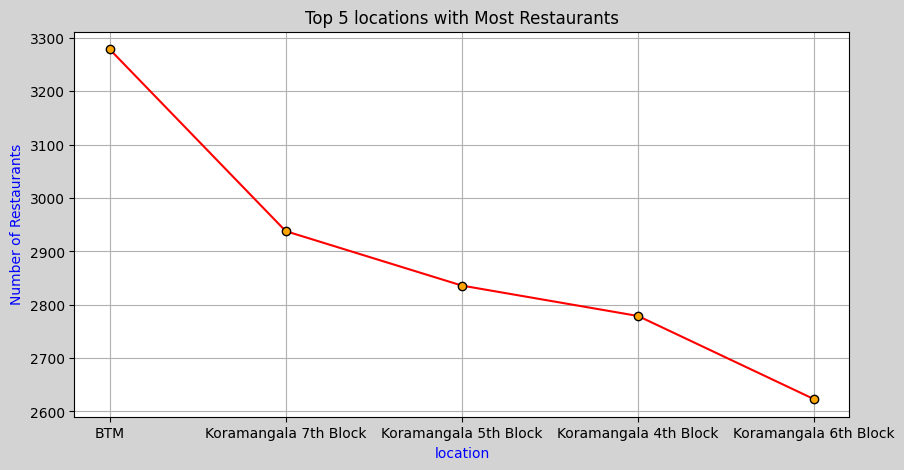

In [248]:
# Top 5 locations with highest number of restaurants
locs = df['location'].value_counts()
locs = locs.head()
locs = pd.DataFrame(locs)
locs.reset_index(inplace=True)

plt.figure(figsize = (10, 5), facecolor = 'lightgrey')
plt.plot(locs['location'], locs['count'], color = 'red', marker = 'o', mec = 'black', mfc = 'orange')
plt.grid()
plt.title("Top 5 locations with Most Restaurants")
plt.xlabel("location", color = 'blue')
plt.ylabel("Number of Restaurants", color = 'blue')
plt.show()

Top 5 locations: **BTM, Koramangala 7th Block, Koramangala 5th Block, Koramangala 4th Block, Koramangala 6th Block**

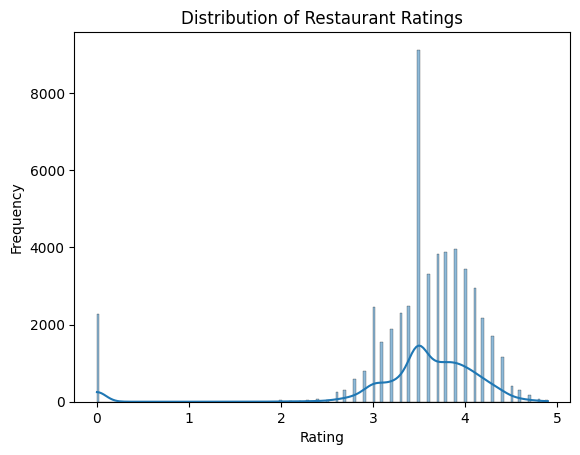

In [194]:
#Distribution of restaurant ratings
sns.histplot(x = df['rate'], data = df, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

**why histplot?**

as we are checking distribution count for different ratings

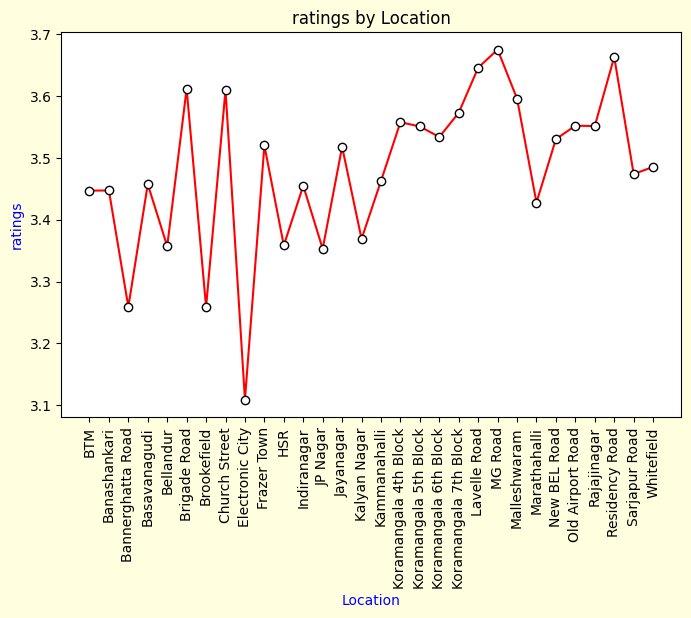

In [259]:
# Distribution of average ratings based on location
rating_loc = df.groupby('location')['rate'].mean()
rating_loc = pd.DataFrame(rating_loc)
rating_loc.reset_index(inplace=True)
plt.figure(figsize = (8, 5), facecolor = 'lightyellow')
plt.xticks(rotation = 90)
plt.plot(rating_loc['location'], rating_loc['rate'], color = 'red', marker = 'o', mec = 'black', mfc = 'white')
plt.title("ratings by Location")
plt.xlabel("Location", color = 'blue')
plt.ylabel("ratings", color = 'blue')
plt.show()

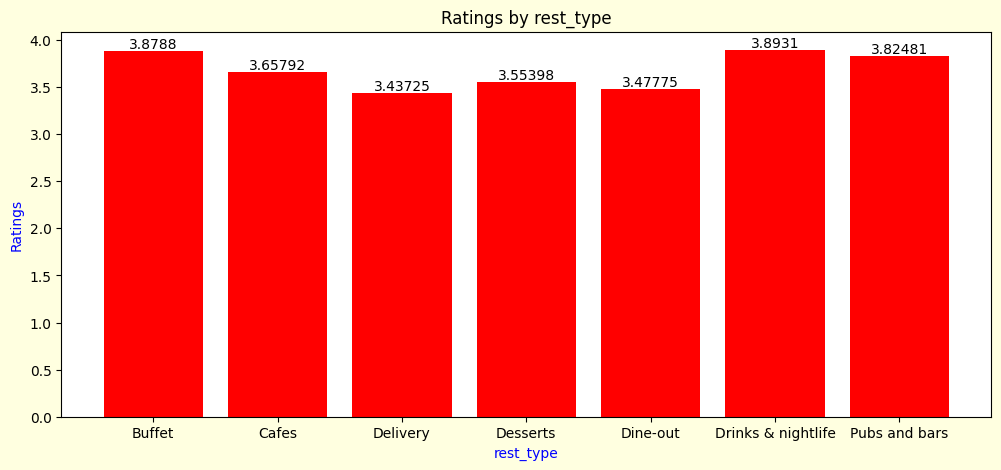

In [261]:
# Distribution of average Ratings based on rest_type
rating_type = df.groupby('rest_type')['rate'].mean()
rating_type = pd.DataFrame(rating_type)
rating_type.reset_index(inplace=True)
plt.figure(figsize = (12, 5), facecolor = 'lightyellow')
# plt.xticks(rotation = 90)
bar = plt.bar(rating_type['rest_type'], rating_type['rate'], color = 'red')
plt.bar_label(bar)
plt.title("Ratings by rest_type")
plt.xlabel("rest_type", color = 'blue')
plt.ylabel("Ratings", color = 'blue')
plt.show()

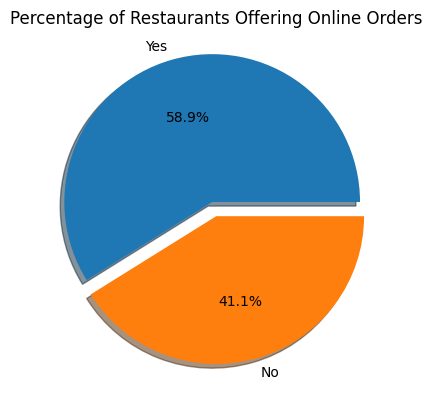

In [249]:
# Percentage of restaurants offering online orders
online_order_counts = df['online_order'].value_counts()
online_order_counts = pd.DataFrame(online_order_counts)
online_order_counts.reset_index(inplace=True)
online_order_counts
l = ['Yes', 'No']
data = online_order_counts['count']

plt.pie(data, labels = l, autopct='%1.1f%%', explode = (0.1, 0), shadow = True)
plt.title("Percentage of Restaurants Offering Online Orders")
plt.show()

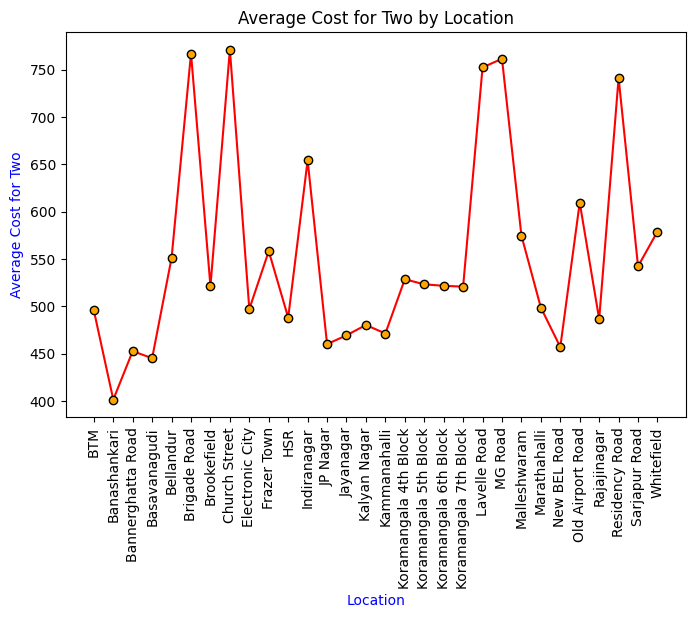

In [266]:
# Distribution of average cost for two based on location
avg_cost_location = df.groupby('location')['cost for 2'].mean()
avg_cost_location = pd.DataFrame(avg_cost_location)
avg_cost_location.reset_index(inplace=True)
plt.figure(figsize = (8, 5))
plt.xticks(rotation = 90)
plt.plot(avg_cost_location['location'], avg_cost_location['cost for 2'], color = 'red', marker = 'o', mec = 'black', mfc = 'orange')
plt.title("Average Cost for Two by Location")
plt.xlabel("Location", color = 'blue')
plt.ylabel("Average Cost for Two", color = 'blue')
plt.show()

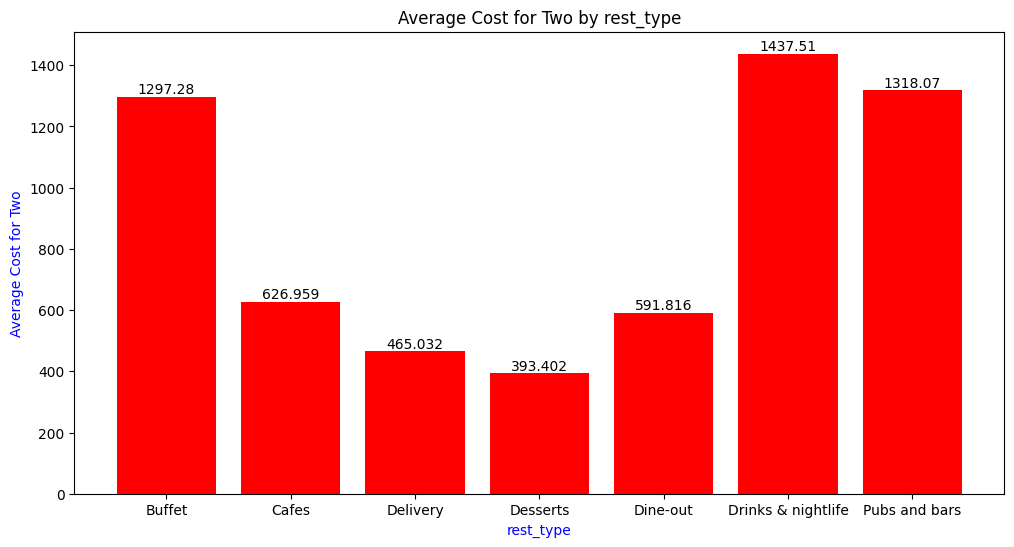

In [267]:
# Distribution of average cost for two based on rest_type
avg_cost_rest_type = df.groupby('rest_type')['cost for 2'].mean()
avg_cost_rest_type = pd.DataFrame(avg_cost_rest_type)
avg_cost_rest_type.reset_index(inplace=True)
plt.figure(figsize = (12, 6))
# plt.xticks(rotation = 45)
bar = plt.bar(avg_cost_rest_type['rest_type'], avg_cost_rest_type['cost for 2'], color = 'red')
plt.bar_label(bar)
plt.title("Average Cost for Two by rest_type")
plt.xlabel("rest_type", color = 'blue')
plt.ylabel("Average Cost for Two", color = 'blue')
plt.show()

##3. Bivariate Analysis
Analyze the relationship between:
- Rating vs Cost
- Rating vs Online Order
- Votes vs Rating

Use appropriate plots (scatter plot, box plot, bar chart, etc.)

Also, must:
- Identify trends or patterns
- Provide short conclusions for each analysis (conclusions should be mentioned as markdown)

In [199]:
df.head()

,name,online_order,book_table,rate,votes,dish_liked,cuisines,cost for 2,rest_type,location
0,Jalsa,1,1,4.1,775,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice elephant,1,0,4.1,787,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San churro cafe,1,0,3.8,918,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri udupi bhojana,0,0,3.7,88,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand village,0,0,3.8,166,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


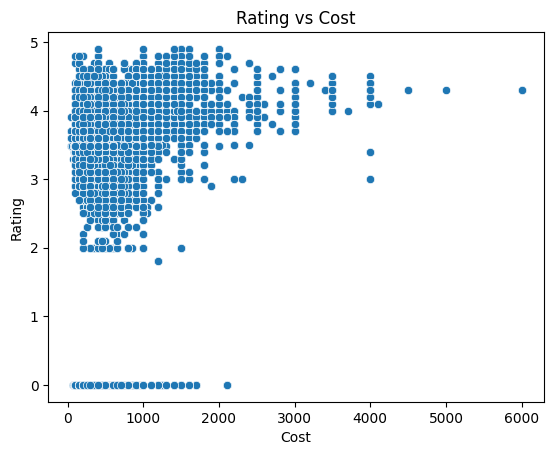

In [273]:
# Rating vs Cost
sns.scatterplot(x = df['cost for 2'], y = df['rate'])
plt.title('Rating vs Cost')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.show()

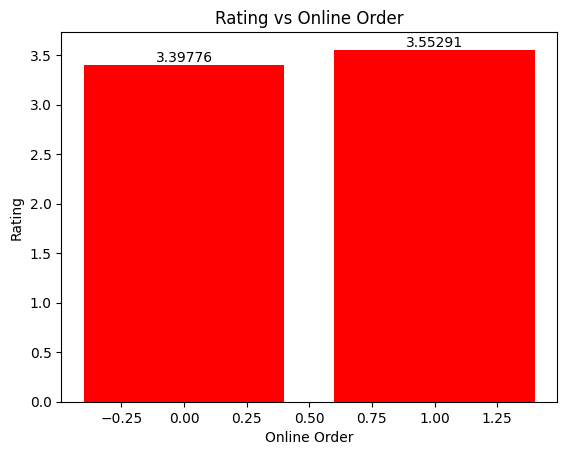

In [227]:
# Rating vs Online Order
# group based on online order
rate_order = df.groupby('online_order')['rate'].mean()
rate_order = pd.DataFrame(rate_order)
rate_order.reset_index(inplace=True)
bar = plt.bar(rate_order['online_order'], rate_order['rate'], color = 'red', facecolor = '')
plt.bar_label(bar)
plt.title("Rating vs Online Order")
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.show()

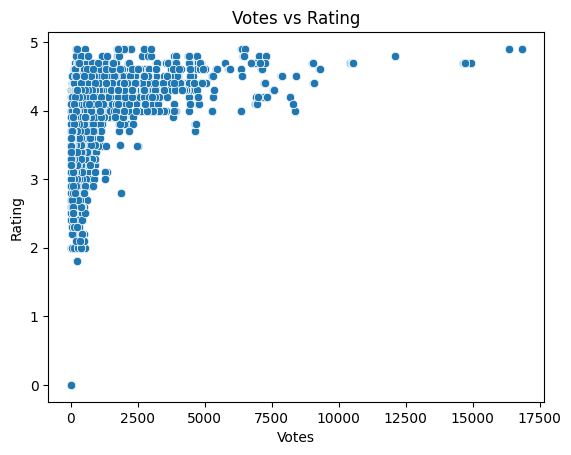

In [272]:
# Votes vs Rating
sns.scatterplot(x = df['votes'], y = df['rate'])
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

**insights**:
- higher the cost, higher the ratings
- not much change in rating on the basis of online orders
- highers the voting correlates well with orders

##4. Business Insights & Recommendations
Based on your analysis, answer the following:

In [252]:
locs = df['location'].value_counts()
locs

,count
location,
BTM,3279
Koramangala 7th Block,2938
Koramangala 5th Block,2836
Koramangala 4th Block,2779
Koramangala 6th Block,2623
Jayanagar,2371
JP Nagar,2096
Indiranagar,1860
Church Street,1827


1. Does higher cost lead to higher ratings?
    - Yes, higher cost leads to higher rating.
2. Does offering online order impact ratings?
    - Not as much, as the results are about the same
3. Which location appears highly competitive?
    - BTM, as it several restaurants in that location
4. Where would you recommend opening a new restaurant?
    - New BEL Road, as it has the least count of restaurants

In [253]:
df.to_csv('zomato_bengaluru_clean.csv')